In [21]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import LearningCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [5]:
test = pd.read_csv("test.csv")
print(f"Datos de prueba:\n{test}")

train = pd.read_csv("train.csv")
print(f"Datos de entrenamiento:\n{train}")

Datos de prueba:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... Sc

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop(columns=["SalePrice"]), train["SalePrice"],
    test_size=0.2, random_state=42
)
X_test = test.copy()

In [23]:
# Aplicar one-hot encoding en ambas 
categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('scaler', numerical_preprocessor, numerical_columns)
])

print(preprocessor)

ColumnTransformer(transformers=[('one-hot-encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'Bsm...
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', '

In [ ]:
# Pipeline con totadas las variables y diferentes parametros para la profundidad del árbol
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeRegressor())])
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]
modelo1 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=5,scoring="neg_root_mean_squared_error") # evaluamos usando CV para ver cuál es el mejor modelo de todos 
modelo1.fit(X_train,y_train)
modelo1.best_params_


{'regressor__max_depth': 7}

In [42]:
# Predicción y cálculo de errores
for depth in [5, 6, 7, 8]:
    # Creamos un nuevo pipeline con la profundidad específica
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Incluimos el preprocesador
        ('regressor', DecisionTreeRegressor(max_depth=depth))
    ])
    
    # Entrenar el modelo con los datos de entrenamiento
    pipeline.fit(X_train, y_train)
    
    # Hacer predicciones en los datos de validación
    y_pred_valid = pipeline.predict(X_valid)
    
    # Calcular métricas de error
    mae = mean_absolute_error(y_valid, y_pred_valid)
    mse = mean_squared_error(y_valid, y_pred_valid)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, y_pred_valid)
    
    # Imprimir resultados
    print(f"\nResultados para profundidad {depth}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")


Resultados para profundidad 5:
MAE: 33313.6569
MSE: 2570810962.6994
RMSE: 50703.1652
R²: 0.6648

Resultados para profundidad 6:
MAE: 32006.2116
MSE: 2430952590.1222
RMSE: 49304.6914
R²: 0.6831

Resultados para profundidad 7:
MAE: 33239.0792
MSE: 2695485050.8599
RMSE: 51918.0609
R²: 0.6486

Resultados para profundidad 8:
MAE: 33893.0284
MSE: 2898017870.6171
RMSE: 53833.2413
R²: 0.6222


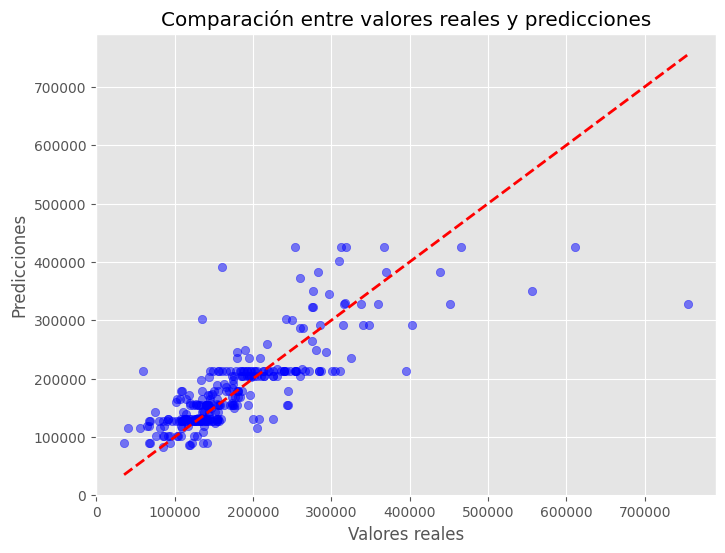

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred_valid, color='blue', alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

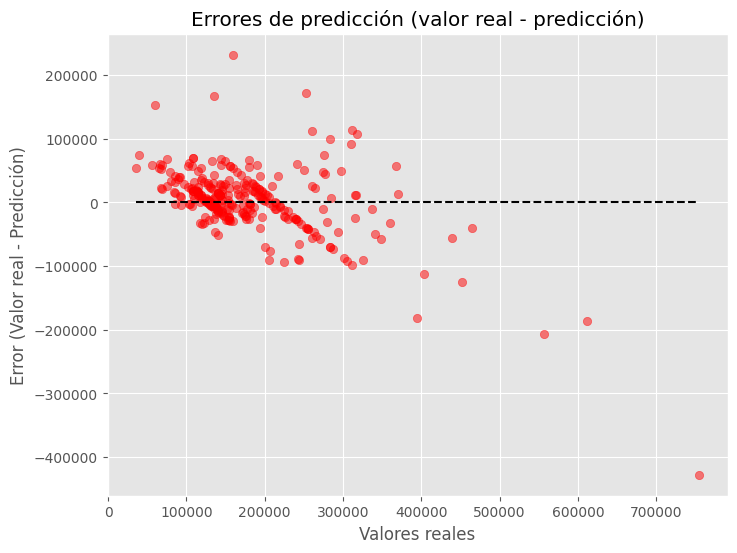

In [44]:
errores = y_pred_valid - y_valid
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_valid.min(), xmax=y_valid.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

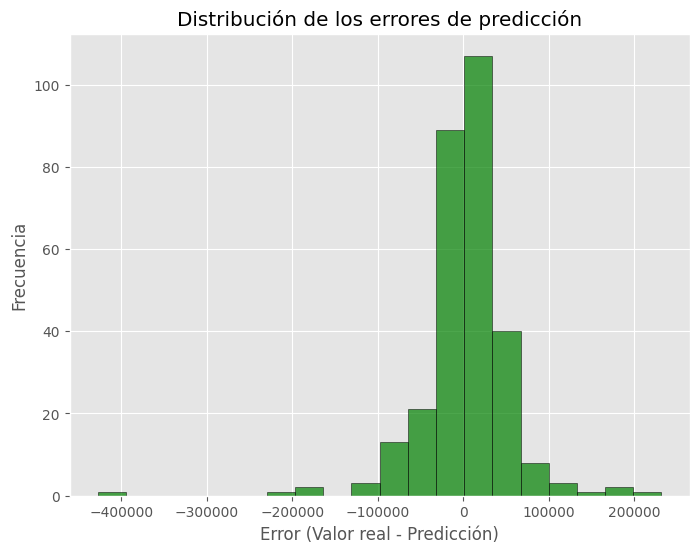

In [45]:
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribución de los errores de predicción")
plt.xlabel("Error (Valor real - Predicción)")
plt.ylabel("Frecuencia")
plt.show()

La primera profundidad tuvo un desempeño aceptable, aunque no es ideal. Muestra un MAE algo alto (de más de 33000), pero tomando en cuenta que el precio esta valores arriba de los 100000, no es tan exagerado. El RMSE de más de 50000 muestra que cuando se toma en cuenta los datos atípicos el error es mayor, por lo que se equivoca más con precios más altos, algo que podemos confirmar con las gráficas. Después tenemos la profundidad 6, la cuál demuestra tener los mejores parámetros. Dando una explicación aproximada del 68% en la variabilidad del precio de las casas según su R². Presenta los mismos problemas que la profundidad 5 pero en menor cantidad. Las otras dos profundidades fueron empeorando. 

Comparado al modelo de regresión lineal, este tuvo un mejor resultado. Lo primero es que tiene una regresión lineal mayor, por lo que esta representa mejor como las variables representan el precio de las casas. Esta diferencia probablemente se debe a que para el árbol se utilizaron todas las variables, aún cuando se sabía que algunas afectaban muy poco el precio de una casa. Por su parte en la regresión se tomaron las variables que después del análisis exploratorio se descubrió que tenían un mayor impacto en el precio.